Using agents column: Have you ever written an `agents.md`, modified your `.claude` directory, or added context specifically for agents in other way?
Using helpfulness column: On a scale of 1 to 5, how would you rate the overall helpfulness of AI in your daily development tasks?


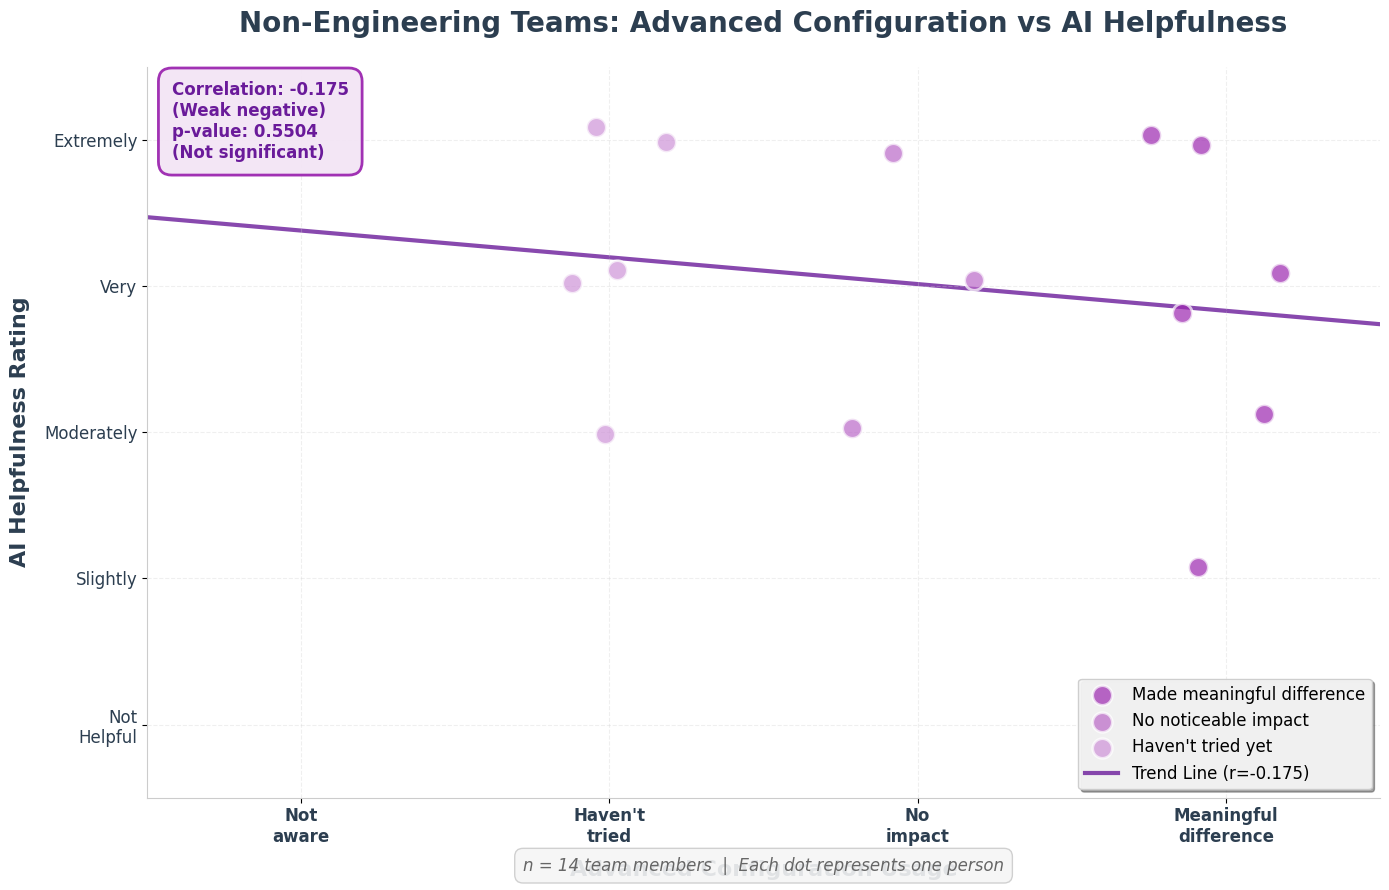


NON-ENGINEERING TEAMS - ADVANCED CONFIG vs AI HELPFULNESS CORRELATION

📊 Sample Size: 14 team members
   Teams: Customer Solutions, Customer Support, Pre-Sales

📈 Correlation Analysis:
   • Pearson Correlation Coefficient: -0.1746
   • Correlation Strength: Weak negative correlation
   • P-value: 5.5040e-01
   • Statistical Significance: Not significant (α = 0.05)

🎯 Interpretation:
   • No clear positive relationship detected

📊 Average Helpfulness by Advanced Config Usage:
   • Yes -- and it made a meaningful difference
     Average: 3.83/5.0 (n=6)
   • Yes -- but I didn't notice much impact
     Average: 4.00/5.0 (n=3)
   • No -- I know it's possible but haven't taken the time
     Average: 4.20/5.0 (n=5)

✨ Key Finding:
   • Team members who tried advanced config: 3.89/5.0 (n=9)
   • Team members who haven't tried: 4.20/5.0 (n=5)
   • Difference: -0.31 points
   • Interesting: Those who haven't tried rate AI higher!

🔍 Non-Engineering vs Engineering Correlation Comparison:
   • No

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

# Load the data
df = pd.read_csv('../../responses.csv')

# Filter to INCLUDE only non-engineering teams
teams_to_include = ['Customer Solutions', 'Customer Support', 'Pre-Sales']
df_filtered = df[df['Which team are you a part of?'].isin(teams_to_include)].copy()

# Get column names
agents_col = df_filtered.columns[16]  # Column Q - agents.md/.claude usage
helpfulness_col = df_filtered.columns[15]  # Column P - Helpfulness rating

print(f"Using agents column: {agents_col}")
print(f"Using helpfulness column: {helpfulness_col}")

# Create numeric mapping for helpfulness
rating_values = {
    'Extremely Helpful': 5,
    'Very Helpful': 4,
    'Moderately Helpful': 3,
    'Slightly Helpful': 2,
    'Not Helpful': 1
}

df_filtered['rating_numeric'] = df_filtered[helpfulness_col].map(rating_values)

# Define agents.md order and numeric mapping
agents_order = [
    'Yes -- and it made a meaningful difference',
    'Yes -- but I didn\'t notice much impact',
    'No -- I know it\'s possible but haven\'t taken the time',
    'No -- I wasn\'t aware that was possible'
]

agents_numeric = {
    'Yes -- and it made a meaningful difference': 4,
    'Yes -- but I didn\'t notice much impact': 3,
    'No -- I know it\'s possible but haven\'t taken the time': 2,
    'No -- I wasn\'t aware that was possible': 1
}

df_filtered['agents_numeric'] = df_filtered[agents_col].map(agents_numeric)

# Remove any rows with missing data
df_clean = df_filtered.dropna(subset=['agents_numeric', 'rating_numeric'])

# Calculate correlation
if len(df_clean) > 1:
    correlation = df_clean['agents_numeric'].corr(df_clean['rating_numeric'])
    correlation_pvalue = stats.pearsonr(df_clean['agents_numeric'], df_clean['rating_numeric'])[1]
else:
    correlation = 0
    correlation_pvalue = 1

# Create figure (increased size for better readability)
fig, ax = plt.subplots(figsize=(14, 9))

# Define colors for each category (purple to pink gradient for non-engineering)
category_colors = {
    'Yes -- and it made a meaningful difference': '#9C27B0',
    'Yes -- but I didn\'t notice much impact': '#BA68C8',
    'No -- I know it\'s possible but haven\'t taken the time': '#CE93D8',
    'No -- I wasn\'t aware that was possible': '#E1BEE7'
}

# Add jitter to see overlapping points
jitter_strength_x = 0.15
jitter_strength_y = 0.1

# Plot each category with different colors
for category in agents_order:
    category_data = df_clean[df_clean[agents_col] == category]
    if len(category_data) > 0:
        x_jittered = category_data['agents_numeric'] + np.random.normal(0, jitter_strength_x, len(category_data))
        y_jittered = category_data['rating_numeric'] + np.random.normal(0, jitter_strength_y, len(category_data))
        
        # Shortened label for legend
        if category == 'Yes -- and it made a meaningful difference':
            label = 'Made meaningful difference'
        elif category == 'Yes -- but I didn\'t notice much impact':
            label = 'No noticeable impact'
        elif category == 'No -- I know it\'s possible but haven\'t taken the time':
            label = 'Haven\'t tried yet'
        else:
            label = 'Not aware'
        
        ax.scatter(x_jittered, y_jittered, 
                  s=200, alpha=0.7, 
                  color=category_colors[category],
                  edgecolors='white', linewidth=2,
                  label=label, zorder=3)

# Add trend line if we have enough data
if len(df_clean) > 1:
    z = np.polyfit(df_clean['agents_numeric'], df_clean['rating_numeric'], 1)
    p = np.poly1d(z)
    x_trend = np.linspace(0.5, 4.5, 100)
    ax.plot(x_trend, p(x_trend), color='#6A1B9A', linewidth=3, alpha=0.8, 
            label=f'Trend Line (r={correlation:.3f})', zorder=1)

# Customize plot
ax.set_xlabel('Advanced Configuration Usage', fontsize=16, weight='bold', color='#2C3E50', labelpad=10)
ax.set_ylabel('AI Helpfulness Rating', fontsize=16, weight='bold', color='#2C3E50', labelpad=10)
ax.set_title('Non-Engineering Teams: Advanced Configuration vs AI Helpfulness', 
            fontsize=20, weight='bold', pad=25, color='#2C3E50')

# Set x-axis labels
ax.set_xticks([1, 2, 3, 4])
ax.set_xticklabels(['Not\naware', 'Haven\'t\ntried', 'No\nimpact', 'Meaningful\ndifference'], 
                   fontsize=12, weight='bold', color='#2C3E50')

# Set y-axis labels
ax.set_yticks([1, 2, 3, 4, 5])
ax.set_yticklabels(['Not\nHelpful', 'Slightly', 'Moderately', 'Very', 'Extremely'], 
                   fontsize=12, color='#2C3E50')

ax.set_xlim(0.5, 4.5)
ax.set_ylim(0.5, 5.5)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('#CCCCCC')
ax.spines['bottom'].set_color('#CCCCCC')
ax.grid(alpha=0.3, linestyle='--', color='#CCCCCC')
ax.legend(fontsize=12, loc='lower right', framealpha=0.95, 
          edgecolor='#CCCCCC', facecolor='#F5F5F5', fancybox=True, shadow=True)

# Add correlation info box if we have data
if len(df_clean) > 1:
    corr_strength = 'Strong' if abs(correlation) > 0.5 else 'Moderate' if abs(correlation) > 0.3 else 'Weak'
    sig_text = 'Significant' if correlation_pvalue < 0.05 else 'Not significant'
    corr_text = f"Correlation: {correlation:.3f}\n({corr_strength} {'positive' if correlation > 0 else 'negative'})\np-value: {correlation_pvalue:.4f}\n({sig_text})"
    
    ax.text(0.02, 0.98, corr_text, 
             transform=ax.transAxes,
             ha='left', 
             va='top',
             fontsize=12, 
             weight='bold',
             bbox=dict(boxstyle='round,pad=0.8', facecolor='#F3E5F5', 
                      edgecolor='#9C27B0', linewidth=2, alpha=0.95),
             color='#6A1B9A')

# Add subtitle with improved styling
plt.text(0.5, -0.1, f'n = {len(df_clean)} team members  |  Each dot represents one person', 
         ha='center', transform=ax.transAxes,
         fontsize=12, style='italic', color='#666666',
         bbox=dict(boxstyle='round,pad=0.5', facecolor='#F5F5F5', 
                  edgecolor='#CCCCCC', linewidth=1, alpha=0.9))

plt.tight_layout()
plt.show()

# Print detailed statistical analysis
print("\n" + "="*80)
print("NON-ENGINEERING TEAMS - ADVANCED CONFIG vs AI HELPFULNESS CORRELATION")
print("="*80)

print(f"\n📊 Sample Size: {len(df_clean)} team members")
print(f"   Teams: Customer Solutions, Customer Support, Pre-Sales")

if len(df_clean) > 1:
    print(f"\n📈 Correlation Analysis:")
    print(f"   • Pearson Correlation Coefficient: {correlation:.4f}")
    print(f"   • Correlation Strength: {corr_strength} {'positive' if correlation > 0 else 'negative'} correlation")
    print(f"   • P-value: {correlation_pvalue:.4e}")
    print(f"   • Statistical Significance: {sig_text} (α = 0.05)")
    
    print(f"\n🎯 Interpretation:")
    if correlation > 0 and correlation_pvalue < 0.05:
        print(f"   • There IS a statistically significant positive relationship")
        print(f"   • Non-engineering team members who use advanced configs rate AI as more helpful")
    elif correlation > 0:
        print(f"   • There appears to be a positive trend, but it's not statistically significant")
        print(f"   • Sample size may be too small to confirm the relationship")
    else:
        print(f"   • No clear positive relationship detected")
    
    # Calculate average ratings by category
    print(f"\n📊 Average Helpfulness by Advanced Config Usage:")
    for category in agents_order:
        category_data = df_clean[df_clean[agents_col] == category]
        if len(category_data) > 0:
            avg = category_data['rating_numeric'].mean()
            count = len(category_data)
            print(f"   • {category}")
            print(f"     Average: {avg:.2f}/5.0 (n={count})")
    
    # Calculate difference between tried and not tried
    tried = df_clean[df_clean['agents_numeric'].isin([3, 4])]
    not_tried = df_clean[df_clean['agents_numeric'].isin([1, 2])]
    
    if len(tried) > 0 and len(not_tried) > 0:
        tried_avg = tried['rating_numeric'].mean()
        not_tried_avg = not_tried['rating_numeric'].mean()
        difference = tried_avg - not_tried_avg
        
        print(f"\n✨ Key Finding:")
        print(f"   • Team members who tried advanced config: {tried_avg:.2f}/5.0 (n={len(tried)})")
        print(f"   • Team members who haven't tried: {not_tried_avg:.2f}/5.0 (n={len(not_tried)})")
        print(f"   • Difference: {difference:.2f} points")
        if difference > 0:
            print(f"   • Those who tried advanced configs rate AI {abs(difference):.2f} points higher")
        elif difference < 0:
            print(f"   • Interesting: Those who haven't tried rate AI higher!")
        
        # Compare to engineering teams
        eng_teams_to_exclude = ['Customer Solutions', 'Customer Support', 'Pre-Sales']
        df_eng = df[~df['Which team are you a part of?'].isin(eng_teams_to_exclude)].copy()
        df_eng['rating_numeric'] = df_eng[helpfulness_col].map(rating_values)
        df_eng['agents_numeric'] = df_eng[agents_col].map(agents_numeric)
        df_eng_clean = df_eng.dropna(subset=['agents_numeric', 'rating_numeric'])
        
        if len(df_eng_clean) > 1:
            eng_correlation = df_eng_clean['agents_numeric'].corr(df_eng_clean['rating_numeric'])
            
            print(f"\n🔍 Non-Engineering vs Engineering Correlation Comparison:")
            print(f"   • Non-Engineering correlation: {correlation:.3f}")
            print(f"   • Engineering correlation: {eng_correlation:.3f}")
            if abs(correlation) > abs(eng_correlation):
                print(f"   • Stronger correlation in non-engineering teams!")
            elif abs(correlation) < abs(eng_correlation):
                print(f"   • Stronger correlation in engineering teams")
            else:
                print(f"   • Similar correlation strength in both groups")
else:
    print(f"\n⚠️  Not enough data points to calculate correlation (n={len(df_clean)})")

# Calculate opportunity
not_aware_count = len(df_clean[df_clean[agents_col] == agents_order[3]])
havent_tried_count = len(df_clean[df_clean[agents_col] == agents_order[2]])

print(f"\n💡 Opportunity:")
print(f"   • {not_aware_count} team members aren't aware advanced config is possible")
print(f"   • {havent_tried_count} team members know about it but haven't tried")
print(f"   • Total opportunity: {not_aware_count + havent_tried_count} team members")
if correlation > 0:
    print(f"   • Given positive correlation, these team members could see higher AI value")

print("\n" + "="*80 + "\n")